### Projeto RBP5802 - 2024
### Exploração de Metiloma de Tumores de Córtex Adrenal

**Nome:** Luís Eduardo Cruvinel Pinto  
**Data:** 14/11/2024

### Descrição

Este projeto utiliza dados do banco de dados público _Gene Expression Omnibus GSE179175_, gerados pelo laboratório de endocrinologia do Hospital de Clínicas da FMRP. O objetivo é aplicar as técnicas de machine learning apresentadas na disciplina para fazer a exploração do metiloma de 57 amostras de Tumor de Córtex Adrenal pediátrico e correlacionar com desfechos clínicos, com finalidade estritamente didática.

### Bibliotecas Utilizadas

- `pandas` 1.3.3
- `numpy` 1.21.2
- `matplotlib` 3.4.3
- `seaborn` 0.11.2
- `scipy` 1.7.1
- `scikit-learn` 0.24.2

### Estrutura do Projeto

- `projeto_intro_ciencia_de_dados.ipynb`: Notebook contendo o código e as análises realizadas.
- `GSE179175_Matrix-processed-Mvalues.csv`: Arquivo contendo os valores M obtidos do preprocessamento dos dados (arquivo público)
- `raw_clinical.csv`: Arquivo contendo os dados clínicos das amostras
- `infinium-methylationepic-v-1-0-b5-manifest-file.csv`: Manifesto do ensaio EPICv1 da Illumina, utilizado para análise dos dados de metilação de DNA das amostras


### Importar as bibliotecas que serão utilizadas

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster
from scipy.stats import chi2_contingency


from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix


pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:,.2f}'.format

### Importar as planilhas e organizar para facilitar a análise

In [260]:
mVals = pd.read_csv('GSE179175_Matrix-processed-Mvalues.csv', sep='\t')
mVals.head()

,ID_REF,pACT001,Detection_Pval,pACT003,Detection_Pval.1,pACT006,Detection_Pval.2,pACT009,Detection_Pval.3,pACT010,Detection_Pval.4,pACT012,Detection_Pval.5,pACT013,Detection_Pval.6,pACT014,Detection_Pval.7,pACT017,Detection_Pval.8,pACT020,Detection_Pval.9,pACT021,Detection_Pval.10,pACT025,Detection_Pval.11,pACT026,Detection_Pval.12,pACT028,Detection_Pval.13,pACT029,Detection_Pval.14,pACT030,Detection_Pval.15,pACT035,Detection_Pval.16,pACT036,Detection_Pval.17,pACT037,Detection_Pval.18,pACT038,Detection_Pval.19,pACT040,Detection_Pval.20,pACT045,Detection_Pval.21,pACT046,Detection_Pval.22,pACT048,Detection_Pval.23,pACT049,...,pACT061,Detection_Pval.32,pACT062,Detection_Pval.33,pACT064,Detection_Pval.34,pACT065,Detection_Pval.35,pACT067,Detection_Pval.36,pACT068,Detection_Pval.37,pACT070,Detection_Pval.38,pACT073,Detection_Pval.39,pACT075,Detection_Pval.40,pACT078,Detection_Pval.41,pACT081,Detection_Pval.42,pACT085,Detection_Pval.43,pACT087,Detection_Pval.44,pACT088,Detection_Pval.45,pACT090,Detection_Pval.46,pACT092,Detection_Pval.47,pACT093,Detection_Pval.48,pACT094,Detection_Pval.49,pACT095,Detection_Pval.50,pACT096,Detection_Pval.51,pACT097,Detection_Pval.52,pACT098,Detection_Pval.53,pACT101,Detection_Pval.54,pACT102,Detection_Pval.55,pACT107,Detection_Pval.56
0,cg00000029,-5.17,0.00,-3.30,0.00,-2.74,0.00,-4.10,0.00,-3.37,0.00,-3.44,0.00,-4.32,0.00,-2.97,0.00,-4.05,0.00,-3.70,0.00,-3.57,0.00,-3.42,0.00,-4.97,0.00,-4.15,0.00,-3.64,0.00,-7.45,0.00,-3.80,0.00,-3.75,0.00,-3.63,0.00,-4.19,0.00,-4.13,0.00,-4.19,0.00,-3.27,0.00,-4.15,0.00,-3.82,...,-3.42,0.00,-2.71,0.00,-4.14,0.00,-3.33,0.00,-3.01,0.00,-4.06,0.00,-3.73,0.00,-3.56,0.00,-3.99,0.00,-3.79,0.00,-4.08,0.00,-5.56,0.00,-4.27,0.00,-4.05,0.00,-4.15,0.00,-4.09,0.00,-4.01,0.00,-3.39,0.00,-3.61,0.00,-3.18,0.00,-2.80,0.00,-3.56,0.00,-3.98,0.00,-3.27,0.00,-3.98,0.00
1,cg00000109,-3.19,0.00,-2.01,0.00,-2.73,0.00,-4.16,0.00,-2.98,0.00,-2.82,0.00,-3.03,0.00,-3.24,0.00,-3.38,0.00,-3.12,0.00,-3.34,0.00,-2.05,0.00,-2.99,0.00,-3.15,0.00,-0.49,0.00,-2.60,0.00,-3.12,0.00,-2.88,0.00,-3.19,0.00,-3.33,0.00,-3.32,0.00,-3.65,0.00,-2.90,0.00,-3.54,0.00,-3.22,...,-3.18,0.00,-2.54,0.00,-3.88,0.00,-2.54,0.00,-3.18,0.00,-3.76,0.00,-2.92,0.00,-2.43,0.00,-3.57,0.00,-3.55,0.00,-3.83,0.00,-3.94,0.00,-3.82,0.00,-2.97,0.00,-3.37,0.00,-2.96,0.00,-3.79,0.00,-3.14,0.00,-3.75,0.00,-1.73,0.00,-2.93,0.00,-3.51,0.00,-0.38,0.00,-3.23,0.00,-2.60,0.00
2,cg00000155,-5.80,0.00,-4.74,0.00,-5.39,0.00,-5.26,0.00,-4.98,0.00,-5.50,0.00,-5.18,0.00,-5.09,0.00,-4.90,0.00,-4.99,0.00,-5.14,0.00,-4.89,0.00,-4.99,0.00,-5.12,0.00,-4.62,0.00,-4.70,0.00,-5.51,0.00,-5.22,0.00,-4.97,0.00,-5.00,0.00,-5.36,0.00,-5.36,0.00,-4.74,0.00,-5.28,0.00,-4.93,...,-4.76,0.00,-4.63,0.00,-4.80,0.00,-5.53,0.00,-4.91,0.00,-5.43,0.00,-4.72,0.00,-4.47,0.00,-5.63,0.00,-5.47,0.00,-5.55,0.00,-5.28,0.00,-5.33,0.00,-5.33,0.00,-5.13,0.00,-5.41,0.00,-5.30,0.00,-5.01,0.00,-4.86,0.00,-3.76,0.00,-5.28,0.00,-5.05,0.00,-4.47,0.00,-4.79,0.00,-5.15,0.00
3,cg00000158,-3.25,0.00,-2.67,0.00,-2.74,0.00,-4.04,0.00,-3.29,0.00,-2.52,0.00,-3.09,0.00,-2.82,0.00,-3.31,0.00,-2.68,0.00,-3.01,0.00,-2.55,0.00,-3.09,0.00,-2.92,0.00,-2.97,0.00,-2.75,0.00,-2.80,0.00,-3.22,0.00,-3.10,0.00,-3.28,0.00,-3.17,0.00,-3.27,0.00,-2.69,0.00,-5.89,0.00,-3.20,...,-3.15,0.00,-2.11,0.00,-2.73,0.00,-2.89,0.00,-2.95,0.00,-3.92,0.00,-2.91,0.00,-2.36,0.00,-3.09,0.00,-2.70,0.00,-3.20,0.00,-3.13,0.00,-3.63,0.00,-2.76,0.00,-3.32,0.00,-3.12,0.00,-3.13,0.00,-2.89,0.00,-3.08,0.00,-2.18,0.00,-3.03,0.00,-2.75,0.00,-2.95,0.00,-2.58,0.00,-5.07,0.00
4,cg00000165,-5.50,0.00,-4.89,0.00,-4.46,0.00,-5.13,0.00,-5.26,0.00,-4.62,0.00,-5.10,0.00,-4.81,0.00,-5.31,0.00,-5.02,0.00,-5.00,0.00,-4.73,0.00,-5.04,0.00,-5.24,0.00,-4.91,0.00,-4.79,0.00,-5.29,0.00,-5.46,0.00,-4.93,0.00,-5.58,0.00,-4.99,0.00,-5.75,0.00,-4.62,0.00,-5.19,0.00,-4.87,...,-5.02,0.00,-4.34,0.00,-5.30,0.00,-4.52,0.00,-5.13,0.00,-5.37,0.00,-5.00,0.00,-4.85,0.00,-5.36,0.00,-5.11,0.00,-5.11,0.00,-5.36,0.00,-4.95,0.00,-5.40,0.00,-5.22,0.00,-5.33,0.00,-5.29,0

In [261]:
mVals_filtered = mVals.drop(mVals.filter(regex='Detection'), axis=1) # Remover colunas que não serão utilizadas
mVals_filtered.columns.values[0] = '' # Renomear a primeira coluna para não atrapalhar a visualização quando for transposta
mVals_filtered.head()

,,pACT001,pACT003,pACT006,pACT009,pACT010,pACT012,pACT013,pACT014,pACT017,pACT020,pACT021,pACT025,pACT026,pACT028,pACT029,pACT030,pACT035,pACT036,pACT037,pACT038,pACT040,pACT045,pACT046,pACT048,pACT049,pACT050,pACT053,pACT054,pACT055,pACT058,pACT059,pACT060,pACT061,pACT062,pACT064,pACT065,pACT067,pACT068,pACT070,pACT073,pACT075,pACT078,pACT081,pACT085,pACT087,pACT088,pACT090,pACT092,pACT093,pACT094,pACT095,pACT096,pACT097,pACT098,pACT101,pACT102,pACT107
0,cg00000029,-5.17,-3.30,-2.74,-4.10,-3.37,-3.44,-4.32,-2.97,-4.05,-3.70,-3.57,-3.42,-4.97,-4.15,-3.64,-7.45,-3.80,-3.75,-3.63,-4.19,-4.13,-4.19,-3.27,-4.15,-3.82,-4.13,-3.36,-3.66,-4.03,-4.66,-3.99,-2.84,-3.42,-2.71,-4.14,-3.33,-3.01,-4.06,-3.73,-3.56,-3.99,-3.79,-4.08,-5.56,-4.27,-4.05,-4.15,-4.09,-4.01,-3.39,-3.61,-3.18,-2.80,-3.56,-3.98,-3.27,-3.98
1,cg00000109,-3.19,-2.01,-2.73,-4.16,-2.98,-2.82,-3.03,-3.24,-3.38,-3.12,-3.34,-2.05,-2.99,-3.15,-0.49,-2.60,-3.12,-2.88,-3.19,-3.33,-3.32,-3.65,-2.90,-3.54,-3.22,-1.43,-2.03,-3.22,-3.85,-2.58,-1.74,-2.94,-3.18,-2.54,-3.88,-2.54,-3.18,-3.76,-2.92,-2.43,-3.57,-3.55,-3.83,-3.94,-3.82,-2.97,-3.37,-2.96,-3.79,-3.14,-3.75,-1.73,-2.93,-3.51,-0.38,-3.23,-2.60
2,cg00000155,-5.80,-4.74,-5.39,-5.26,-4.98,-5.50,-5.18,-5.09,-4.90,-4.99,-5.14,-4.89,-4.99,-5.12,-4.62,-4.70,-5.51,-5.22,-4.97,-5.00,-5.36,-5.36,-4.74,-5.28,-4.93,-4.78,-4.73,-5.23,-5.50,-4.78,-4.64,-4.58,-4.76,-4.63,-4.80,-5.53,-4.91,-5.43,-4.72,-4.47,-5.63,-5.47,-5.55,-5.28,-5.33,-5.33,-5.13,-5.41,-5.30,-5.01,-4.86,-3.76,-5.28,-5.05,-4.47,-4.79,-5.15
3,cg00000158,-3.25,-2.67,-2.74,-4.04,-3.29,-2.52,-3.09,-2.82,-3.31,-2.68,-3.01,-2.55,-3.09,-2.92,-2.97,-2.75,-2.80,-3.22,-3.10,-3.28,-3.17,-3.27,-2.69,-5.89,-3.20,-2.62,-2.51,-3.25,-3.32,-3.66,-3.08,-2.30,-3.15,-2.11,-2.73,-2.89,-2.95,-3.92,-2.91,-2.36,-3.09,-2.70,-3.20,-3.13,-3.63,-2.76,-3.32,-3.12,-3.13,-2.89,-3.08,-2.18,-3.03,-2.75,-2.95,-2.58,-5.07
4,cg00000165,-5.50,-4.89,-4.46,-5.13,-5.26,-4.62,-5.10,-4.81,-5.31,-5.02,-5.00,-4.73,-5.04,-5.24,-4.91,-4.79,-5.29,-5.46,-4.93,-5.58,-4.99,-5.75,-4.62,-5.19,-4.87,-4.86,-5.20,-5.05,-5.14,-5.51,-4.93,-4.83,-5.02,-4.34,-5.30,-4.52,-5.13,-5.37,-5.00,-4.85,-5.36,-5.11,-5.11,-5.36,-4.95,-5.40,-5.22,-5.33,-5.29,-5.09,-4.86,-3.67,-4.95,-4.94,-4.92,-4.74,-5.07


In [262]:
mVals_transposed = mVals_filtered.transpose() # Transpor a matriz para ter as probes como colunas e as amostras como linhas
mVals_transposed.columns = mVals_transposed.iloc[0] # Renomear as colunas com os valores da primeira linha, pois o comportamento padrão é transpor os 'index' para colunas
mVals_transposed = mVals_transposed.drop(mVals_transposed.index[0])

mVals_transposed.reset_index(names = 'id', inplace=True)
display(mVals_transposed.head())

,id,cg00000029,cg00000109,cg00000155,cg00000158,cg00000165,cg00000221,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000540,cg00000579,cg00000596,cg00000622,cg00000658,cg00000714,cg00000721,cg00000734,cg00000765,cg00000769,cg00000776,cg00000884,cg00000905,cg00000924,cg00000948,cg00000957,cg00000974,cg00001099,cg00001193,cg00001224,cg00001245,cg00001249,cg00001269,cg00001364,cg00001446,cg00001503,cg00001506,cg00001520,cg00001534,cg00001582,cg00001583,cg00001594,cg00001610,cg00001636,cg00001638,cg00001687,cg00001747,cg00001755,...,ch.8.72877942F,ch.8.74124882F,ch.8.745965F,ch.8.76350685F,ch.8.841871F,ch.8.842844F,ch.8.89640933F,ch.8.89733515F,ch.8.90495221F,ch.8.91747740F,ch.8.91748119F,ch.8.9203391F,ch.8.975024F,ch.9.1037862F,ch.9.1173620F,ch.9.120938663F,ch.9.1233470F,ch.9.1286602F,ch.9.129616782F,ch.9.130720330F,ch.9.1355968F,ch.9.137242878F,ch.9.1395144F,ch.9.1470405F,ch.9.1518492F,ch.9.1568505F,ch.9.16291106F,ch.9.1678974F,ch.9.178852F,ch.9.1930815F,ch.9.1976398F,ch.9.2172872F,ch.9.2295001F,ch.9.2787281F,ch.9.28950438F,ch.9.31486459F,ch.9.75018133F,ch.9.80193246F,ch.9.82095949F,ch.9.83519450F,ch.9.84051654F,ch.9.84078312F,ch.9.86947500F,ch.9.87682774F,ch.9.88862796F,ch.9.90287778F,ch.9.919537F,ch.9.97139671F,ch.9.98959675F,ch.9.991104F
0,pACT001,-5.17,-3.19,-5.80,-3.25,-5.50,-5.45,-3.43,-5.48,-5.89,-5.50,-6.13,-5.42,-4.52,-5.96,-4.56,-4.80,-5.13,-4.75,-5.74,-5.40,-4.52,-5.46,-3.66,-5.61,-4.74,-4.12,-5.01,-5.52,-5.48,-5.82,-5.67,-4.98,-4.98,-4.98,-4.75,-4.32,-4.61,-2.57,-5.54,-4.66,-6.06,-4.93,-3.69,-5.04,-5.03,-4.73,-5.30,-5.78,-5.00,...,2.61,3.49,-6.62,5.34,0.08,3.68,2.23,-4.60,-5.18,-4.73,3.96,0.60,3.75,-0.76,3.28,3.36,-0.28,-0.21,-5.67,1.88,-1.03,-0.39,-5.92,3.68,2.39,0.20,-4.98,2.45,-4.52,-5.35,3.92,-4.73,3.03,-3.11,2.34,-5.49,-5.01,4.06,-4.58,1.06,1.95,0.41,1.72,3.13,-0.24,0.75,3.96,3.76,2.84,-2.35
1,pACT003,-3.30,-2.01,-4.74,-2.67,-4.89,-5.18,-2.58,-5.18,-4.93,-4.77,-5.84,-5.78,-3.42,-5.47,-2.95,-3.98,-4.37,-3.37,-4.35,-4.52,-3.70,-4.17,-2.66,-4.18,-3.52,-3.25,-4.19,-3.04,-5.14,-5.32,-5.23,-5.02,-4.18,-4.00,-3.21,-3.70,-3.67,-2.29,-5.18,-4.30,-3.61,-4.91,-4.01,-4.18,-3.90,-4.94,-4.91,-5.34,-4.48,...,2.89,3.30,-6.52,5.26,1.84,2.35,1.67,-4.94,-5.40,-4.78,3.73,1.09,3.61,3.97,2.30,3.14,1.32,1.59,-5.56,1.59,1.98,-1.08,-5.23,3.42,3.50,-1.57,-4.80,2.12,1.55,-5.07,3.49,-4.16,2.90,-3.40,2.21,-5.67,2.29,3.53,3.38,-0.11,-0.10,2.46,1.11,0.77,1.81,-4.27,3.54,3.50,2.74,-1.78
2,pACT006,-2.74,-2.73,-5.39,-2.74,-4.46,-5.26,-2.89,-5.19,-5.81,-5.35,-5.32,-5.55,-4.21,-5.55,-3.43,-4.30,-4.42,-3.27,-5.68,-5.49,-3.61,-3.83,-2.74,-5.79,-3.95,-3.69,-4.72,-5.38,-5.04,-5.52,-5.69,-4.34,-4.52,-4.19,-3.27,-3.19,-6.11,-2.14,-5.36,-4.44,-5.49,-5.04,-3.90,-4.70,-4.36,-4.76,-5.14,-4.52,-4.40,...,2.03,3.05,-6.37,5.42,1.79,2.69,0.17,-5.07,-5.79,-4.01,3.66,-0.77,3.55,3.50,2.65,2.82,-0.15,-0.88,-5.46,2.03,0.44,0.01,-5.58,3.01,2.60,-0.91,-4.41,2.38,-0.85,-5.36,1.51,-4.52,2.66,-3.77,1.96,-5.65,-0.80,3.33,-0.58,-3.13,0.21,0.42,-0.66,-0.89,2.00,-4.38,3.13,3.24,2.25,-3.66
3,pACT009,-4.10,-4.16,-5.26,-4.04,-5.13,-5.79,-3.07,-5.07,-5.90,-5.43,-5.97,-5.64,-4.61,-5.34,-3.74,-4.01,-4.84,-4.20,-5.62,-5.28,-4.28,-5.00,-3.71,-5.69,-4.11,-3.77,-4.95,-5.40,-5.06,-5.55,-5.61,-3.83,-4.84,-4.73,-4.92,-5.20,-5.87,-1.99,-5.33,-4.35,-5.34,-4.60,-3.37,-5.89,-4.37,-5.34,-5.06,-5.28,-4.72,...,2.94,3.34,-6.35,5.47,2.23,0.84,-0.49,-4.86,-5.63,-4.43,3.50,0.16,3.95,3.60,2.70,3.05,-1.00,-0.79,-5.53,1.92,1.60,2.74,-5.66,3.79,2.52,-1.65,-4.46,2.50,0.22,-5.29,3.20,-4.25,3.27,-3.49,2.05,-5.59,0.18,3.91,2.48,0.12,-2.87,1.90,1.79,1.31,1.67,-3.52,4.07,3.80,2.39,-3.39
4,pACT010,-3.37,-2.98,-4.98,-3.29,-5.26,-5.32,-3.20,-5.52,-6.00,-5.35,-5.37,-5.66,-4.14,-5.12,-4.14,-4.80,-4.86,-4.18,-5.52,-5.58,-4.26,-4.57,-2.97,-5.44,-7.67,-3.97,-4.09,-5.75,-5.52,-5.27,-5.71,-4.62,-4.81,-4.56,-4.00,-3.89,-4.48,-2.06,-5.27,-4.43,-5.68,-5.02,-3.94,-5.06,-4.52,-5.19,-4.77,-5.08,-4.55,...,2.83,2.94,-6.00,5.25,1.88,2.65,1.32,-4.96,-4.02,-4.29,3.86,0.82,4.02,1.67,2.90,3.10,-0.11,0.78,-5.65,2.16,1.30

In [263]:
clinical = pd.read_csv('raw_clinical.csv') # Importar os dados clínicos
clinical.head()

,Anonym ID,GEO ID,Methylation group,Reference center,Sex,Age at diagnosis (years),Clinical presentation,Tumor size (cm),Tumor weight (g),Disease stage,Tumor diagnosis (score),Adjuvant chemotherapy,Recurrence/metastasis,Follow-up (years),Outcome,Germline p53,Somatic B-catenin
0,pACT001,GSM5411003,pACT-1,FMRP-USP,F,8.00,C,9.50,230.00,III,UMP (3),Yes,Yes,1.30,Deceased,p.R337H,WT
1,pACT003,GSM5411004,pACT-2,FMRP-USP,F,0.20,A,2.60,6.00,IV,ACA (1),Yes,No,2.80,Alive and disease-free,p.P152L,WT
2,pACT006,GSM5411005,pACT-2,BCC-SUC,M,1.20,V,8.50,120.00,II,UMP (3),No,No,1.50,Alive and disease-free,NaN,NaN
3,pACT009,GSM5411006,pACT-2,FMRP-USP,F,1.40,V,8.00,151.00,II,UMP (3),No,No,9.60,Alive and disease-free,p.R337H,p.S37C
4,pACT010,GSM5411007,pACT-2,BCC-SUC,F,2.90,V,3.00,11.50,I,ACA (1),No,No,5.40,Alive and disease-free,p.R337H,WT


In [264]:
relevant_targets = ['Anonym ID', 'Sex', 'Clinical presentation', 'Disease stage', 'Outcome'] # Selecionar as colunas relevantes
clinical_filtered = clinical.filter(relevant_targets) # Filtrar as colunas relevantes
clinical_filtered.columns = clinical_filtered.columns.str.lower().str.replace(' ', '_') # Padronizar os nomes das colunas para facilitar a manipulação
clinical_filtered.rename(columns={'anonym_id':'id'}, inplace=True) # Padronizar o nome da coluna que será utilizada como "merge"
clinical_filtered.head()

,id,sex,clinical_presentation,disease_stage,outcome
0,pACT001,F,C,III,Deceased
1,pACT003,F,A,IV,Alive and disease-free
2,pACT006,M,V,II,Alive and disease-free
3,pACT009,F,V,II,Alive and disease-free
4,pACT010,F,V,I,Alive and disease-free


In [265]:
df = pd.merge(clinical_filtered, mVals_transposed, on='id') # Juntar as duas planilhas (dados clínicos e dados de metilação)
df.head()

,id,sex,clinical_presentation,disease_stage,outcome,cg00000029,cg00000109,cg00000155,cg00000158,cg00000165,cg00000221,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000540,cg00000579,cg00000596,cg00000622,cg00000658,cg00000714,cg00000721,cg00000734,cg00000765,cg00000769,cg00000776,cg00000884,cg00000905,cg00000924,cg00000948,cg00000957,cg00000974,cg00001099,cg00001193,cg00001224,cg00001245,cg00001249,cg00001269,cg00001364,cg00001446,cg00001503,cg00001506,cg00001520,cg00001534,cg00001582,cg00001583,cg00001594,cg00001610,cg00001636,...,ch.8.72877942F,ch.8.74124882F,ch.8.745965F,ch.8.76350685F,ch.8.841871F,ch.8.842844F,ch.8.89640933F,ch.8.89733515F,ch.8.90495221F,ch.8.91747740F,ch.8.91748119F,ch.8.9203391F,ch.8.975024F,ch.9.1037862F,ch.9.1173620F,ch.9.120938663F,ch.9.1233470F,ch.9.1286602F,ch.9.129616782F,ch.9.130720330F,ch.9.1355968F,ch.9.137242878F,ch.9.1395144F,ch.9.1470405F,ch.9.1518492F,ch.9.1568505F,ch.9.16291106F,ch.9.1678974F,ch.9.178852F,ch.9.1930815F,ch.9.1976398F,ch.9.2172872F,ch.9.2295001F,ch.9.2787281F,ch.9.28950438F,ch.9.31486459F,ch.9.75018133F,ch.9.80193246F,ch.9.82095949F,ch.9.83519450F,ch.9.84051654F,ch.9.84078312F,ch.9.86947500F,ch.9.87682774F,ch.9.88862796F,ch.9.90287778F,ch.9.919537F,ch.9.97139671F,ch.9.98959675F,ch.9.991104F
0,pACT001,F,C,III,Deceased,-5.17,-3.19,-5.80,-3.25,-5.50,-5.45,-3.43,-5.48,-5.89,-5.50,-6.13,-5.42,-4.52,-5.96,-4.56,-4.80,-5.13,-4.75,-5.74,-5.40,-4.52,-5.46,-3.66,-5.61,-4.74,-4.12,-5.01,-5.52,-5.48,-5.82,-5.67,-4.98,-4.98,-4.98,-4.75,-4.32,-4.61,-2.57,-5.54,-4.66,-6.06,-4.93,-3.69,-5.04,-5.03,...,2.61,3.49,-6.62,5.34,0.08,3.68,2.23,-4.60,-5.18,-4.73,3.96,0.60,3.75,-0.76,3.28,3.36,-0.28,-0.21,-5.67,1.88,-1.03,-0.39,-5.92,3.68,2.39,0.20,-4.98,2.45,-4.52,-5.35,3.92,-4.73,3.03,-3.11,2.34,-5.49,-5.01,4.06,-4.58,1.06,1.95,0.41,1.72,3.13,-0.24,0.75,3.96,3.76,2.84,-2.35
1,pACT003,F,A,IV,Alive and disease-free,-3.30,-2.01,-4.74,-2.67,-4.89,-5.18,-2.58,-5.18,-4.93,-4.77,-5.84,-5.78,-3.42,-5.47,-2.95,-3.98,-4.37,-3.37,-4.35,-4.52,-3.70,-4.17,-2.66,-4.18,-3.52,-3.25,-4.19,-3.04,-5.14,-5.32,-5.23,-5.02,-4.18,-4.00,-3.21,-3.70,-3.67,-2.29,-5.18,-4.30,-3.61,-4.91,-4.01,-4.18,-3.90,...,2.89,3.30,-6.52,5.26,1.84,2.35,1.67,-4.94,-5.40,-4.78,3.73,1.09,3.61,3.97,2.30,3.14,1.32,1.59,-5.56,1.59,1.98,-1.08,-5.23,3.42,3.50,-1.57,-4.80,2.12,1.55,-5.07,3.49,-4.16,2.90,-3.40,2.21,-5.67,2.29,3.53,3.38,-0.11,-0.10,2.46,1.11,0.77,1.81,-4.27,3.54,3.50,2.74,-1.78
2,pACT006,M,V,II,Alive and disease-free,-2.74,-2.73,-5.39,-2.74,-4.46,-5.26,-2.89,-5.19,-5.81,-5.35,-5.32,-5.55,-4.21,-5.55,-3.43,-4.30,-4.42,-3.27,-5.68,-5.49,-3.61,-3.83,-2.74,-5.79,-3.95,-3.69,-4.72,-5.38,-5.04,-5.52,-5.69,-4.34,-4.52,-4.19,-3.27,-3.19,-6.11,-2.14,-5.36,-4.44,-5.49,-5.04,-3.90,-4.70,-4.36,...,2.03,3.05,-6.37,5.42,1.79,2.69,0.17,-5.07,-5.79,-4.01,3.66,-0.77,3.55,3.50,2.65,2.82,-0.15,-0.88,-5.46,2.03,0.44,0.01,-5.58,3.01,2.60,-0.91,-4.41,2.38,-0.85,-5.36,1.51,-4.52,2.66,-3.77,1.96,-5.65,-0.80,3.33,-0.58,-3.13,0.21,0.42,-0.66,-0.89,2.00,-4.38,3.13,3.24,2.25,-3.66
3,pACT009,F,V,II,Alive and disease-free,-4.10,-4.16,-5.26,-4.04,-5.13,-5.79,-3.07,-5.07,-5.90,-5.43,-5.97,-5.64,-4.61,-5.34,-3.74,-4.01,-4.84,-4.20,-5.62,-5.28,-4.28,-5.00,-3.71,-5.69,-4.11,-3.77,-4.95,-5.40,-5.06,-5.55,-5.61,-3.83,-4.84,-4.73,-4.92,-5.20,-5.87,-1.99,-5.33,-4.35,-5.34,-4.60,-3.37,-5.89,-4.37,...,2.94,3.34,-6.35,5.47,2.23,0.84,-0.49,-4.86,-5.63,-4.43,3.50,0.16,3.95,3.60,2.70,3.05,-1.00,-0.79,-5.53,1.92,1.60,2.74,-5.66,3.79,2.52,-1.65,-4.46,2.50,0.22,-5.29,3.20,-4.25,3.27,-3.49,2.05,-5.59,0.18,3.91,2.48,0.12,-2.87,1.90,1.79,1.31,1.67,-3.52,4.07,3.80,2.39,-3.39
4,pACT010,F,V,I,Alive and disease-free,-3.37,-2.98,-4.98,-3.29,-5.26,-5.32,-3.20,-5.52,-6.00,-5.35,-5.37,-5.66,-4.14,-5.12,-4.14,-4.80,-4.86,-4.18,-5.52,-5.58,-4.26,-4.57,-2.97,-5.44,-7.67,-3.97,-4.09,-5.75,-5.52,-5.27,-5.71,-4.62,-4.81,-4.56,-4.00,-3.89,-4.48,-2.06,-5.27,-4.43,-5.68,-5.02,-3.94,-5.06,-4.52,...,2.83,2.94,-6.00,5.25,1.88,2.65,1.32,-4.96,-4.02,-4.29,3.86,0.82,4.02,1.67,2.90,3.10,-0.11,

### Aplicar análise não supervisionada de agrupamento hierárquico

In [266]:
X = df.drop(df.columns[df.columns.get_loc('id'):df.columns.get_loc('outcome') + 1], axis=1) # Preparar os dados que serão utilizados

In [267]:
X_converted = X.apply(pd.to_numeric, errors='coerce') # Converter todos os dados para numéricos


In [268]:
X_converted.dtypes.value_counts() # Verificar se todos os dados foram convertidos corretamente

float64    766072
Name: count, dtype: int64

### Encontramos o primeiro erro difícil de resolver. Aparentemente existe algum valor 'não finito' na planilha

ValueError: The condensed distance matrix must contain only finite values.

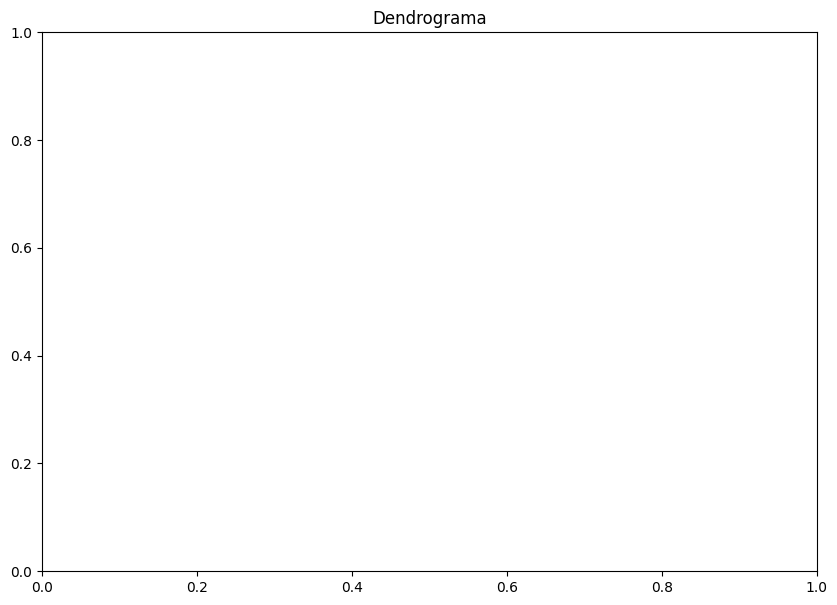

In [63]:
# plt.figure(figsize=(10, 7))
# plt.title("Dendrograma")
# dend = shc.dendrogram(shc.linkage(X_converted, method='single'))

In [ ]:
non_finite = np.isfinite(X_converted) # Buscar valores que são finitos
rows, cols = np.where(~non_finite) # Buscar as linhas e colunas que contém valores não finitos
for r, c in zip(rows,cols):
    print(f"Non-finite value at row {r}, column {X_converted.columns[c]}")

Non-finite value at row 2, column cg03339065
Non-finite value at row 6, column cg05200715
Non-finite value at row 15, column cg13941256
Non-finite value at row 35, column cg13941256
Non-finite value at row 45, column cg05200715


In [270]:
X_converted.replace([np.inf, -np.inf], 0, inplace=True) # Substituir valores infinitos por 0 (valor-M "neutro")

In [271]:
hierarchical_clusters = shc.linkage(X_converted, method='ward', metric='euclidean')

# plt.figure(figsize=(12, 8))
# plt.title("Dendrograma")
# dend = shc.dendrogram

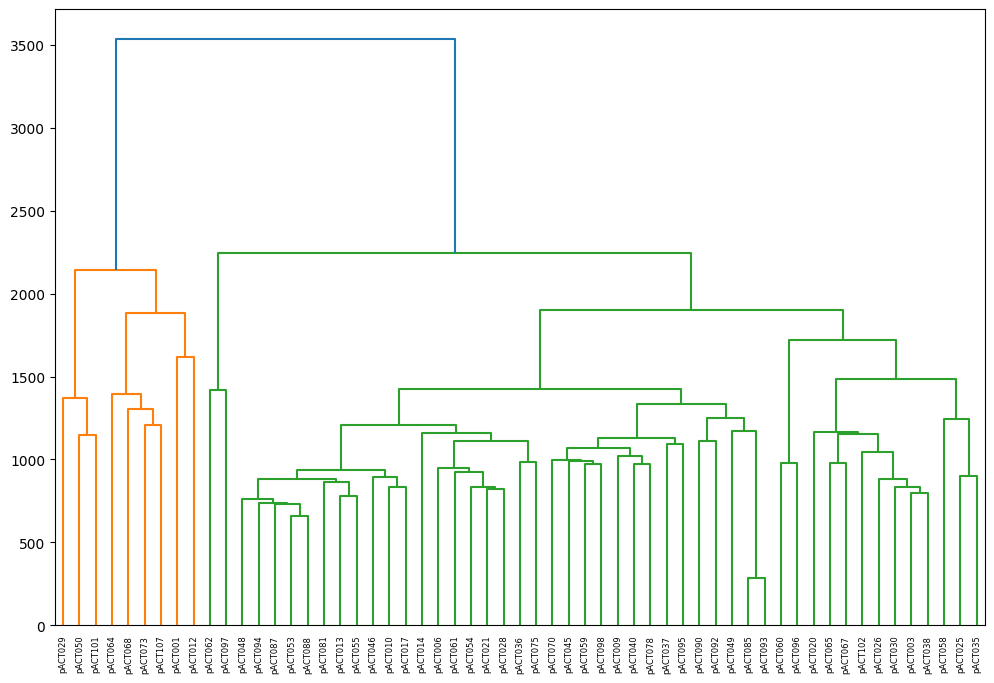

In [272]:
plt.figure(figsize=(12,8))
dend = shc.dendrogram(hierarchical_clusters, labels = df['id'].to_numpy())

#### Aparentemente as amostras se agruparam em um padrão não simétrico com base nos dados de metilação.
#### Próxima etapa: definir se existe alguma associação desse agrupamento com algum dos dados clínicos que temos disponíveis

In [273]:
clusters = fcluster(hierarchical_clusters, t=2, criterion='maxclust') # Obter os clusters
print(clusters)

[1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2
 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1]


In [274]:
test = pd.DataFrame({
    'id':df['id'],
    'cluster':clusters
    }).sort_values(by='cluster')

display(test) # Exibir os IDs e os respectivos clusters

,id,cluster
0,pACT001,1
54,pACT101,1
39,pACT073,1
37,pACT068,1
34,pACT064,1
25,pACT050,1
14,pACT029,1
56,pACT107,1
5,pACT012,1
8,pACT017,2


In [ ]:
df['clusters'] = clusters # Incluir os clusters no df principal
df['clusters'] = df['clusters'].apply(lambda x: 'cluster_A' if x == 1 else 'cluster_B') # Substituir os nomes dos clusters por algo mais legível
df.head()

,id,sex,clinical_presentation,disease_stage,outcome,cg00000029,cg00000109,cg00000155,cg00000158,cg00000165,cg00000221,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000540,cg00000579,cg00000596,cg00000622,cg00000658,cg00000714,cg00000721,cg00000734,cg00000765,cg00000769,cg00000776,cg00000884,cg00000905,cg00000924,cg00000948,cg00000957,cg00000974,cg00001099,cg00001193,cg00001224,cg00001245,cg00001249,cg00001269,cg00001364,cg00001446,cg00001503,cg00001506,cg00001520,cg00001534,cg00001582,cg00001583,cg00001594,cg00001610,cg00001636,...,ch.8.74124882F,ch.8.745965F,ch.8.76350685F,ch.8.841871F,ch.8.842844F,ch.8.89640933F,ch.8.89733515F,ch.8.90495221F,ch.8.91747740F,ch.8.91748119F,ch.8.9203391F,ch.8.975024F,ch.9.1037862F,ch.9.1173620F,ch.9.120938663F,ch.9.1233470F,ch.9.1286602F,ch.9.129616782F,ch.9.130720330F,ch.9.1355968F,ch.9.137242878F,ch.9.1395144F,ch.9.1470405F,ch.9.1518492F,ch.9.1568505F,ch.9.16291106F,ch.9.1678974F,ch.9.178852F,ch.9.1930815F,ch.9.1976398F,ch.9.2172872F,ch.9.2295001F,ch.9.2787281F,ch.9.28950438F,ch.9.31486459F,ch.9.75018133F,ch.9.80193246F,ch.9.82095949F,ch.9.83519450F,ch.9.84051654F,ch.9.84078312F,ch.9.86947500F,ch.9.87682774F,ch.9.88862796F,ch.9.90287778F,ch.9.919537F,ch.9.97139671F,ch.9.98959675F,ch.9.991104F,clusters
0,pACT001,F,C,III,Deceased,-5.17,-3.19,-5.80,-3.25,-5.50,-5.45,-3.43,-5.48,-5.89,-5.50,-6.13,-5.42,-4.52,-5.96,-4.56,-4.80,-5.13,-4.75,-5.74,-5.40,-4.52,-5.46,-3.66,-5.61,-4.74,-4.12,-5.01,-5.52,-5.48,-5.82,-5.67,-4.98,-4.98,-4.98,-4.75,-4.32,-4.61,-2.57,-5.54,-4.66,-6.06,-4.93,-3.69,-5.04,-5.03,...,3.49,-6.62,5.34,0.08,3.68,2.23,-4.60,-5.18,-4.73,3.96,0.60,3.75,-0.76,3.28,3.36,-0.28,-0.21,-5.67,1.88,-1.03,-0.39,-5.92,3.68,2.39,0.20,-4.98,2.45,-4.52,-5.35,3.92,-4.73,3.03,-3.11,2.34,-5.49,-5.01,4.06,-4.58,1.06,1.95,0.41,1.72,3.13,-0.24,0.75,3.96,3.76,2.84,-2.35,cluster_A
1,pACT003,F,A,IV,Alive and disease-free,-3.30,-2.01,-4.74,-2.67,-4.89,-5.18,-2.58,-5.18,-4.93,-4.77,-5.84,-5.78,-3.42,-5.47,-2.95,-3.98,-4.37,-3.37,-4.35,-4.52,-3.70,-4.17,-2.66,-4.18,-3.52,-3.25,-4.19,-3.04,-5.14,-5.32,-5.23,-5.02,-4.18,-4.00,-3.21,-3.70,-3.67,-2.29,-5.18,-4.30,-3.61,-4.91,-4.01,-4.18,-3.90,...,3.30,-6.52,5.26,1.84,2.35,1.67,-4.94,-5.40,-4.78,3.73,1.09,3.61,3.97,2.30,3.14,1.32,1.59,-5.56,1.59,1.98,-1.08,-5.23,3.42,3.50,-1.57,-4.80,2.12,1.55,-5.07,3.49,-4.16,2.90,-3.40,2.21,-5.67,2.29,3.53,3.38,-0.11,-0.10,2.46,1.11,0.77,1.81,-4.27,3.54,3.50,2.74,-1.78,cluster_B
2,pACT006,M,V,II,Alive and disease-free,-2.74,-2.73,-5.39,-2.74,-4.46,-5.26,-2.89,-5.19,-5.81,-5.35,-5.32,-5.55,-4.21,-5.55,-3.43,-4.30,-4.42,-3.27,-5.68,-5.49,-3.61,-3.83,-2.74,-5.79,-3.95,-3.69,-4.72,-5.38,-5.04,-5.52,-5.69,-4.34,-4.52,-4.19,-3.27,-3.19,-6.11,-2.14,-5.36,-4.44,-5.49,-5.04,-3.90,-4.70,-4.36,...,3.05,-6.37,5.42,1.79,2.69,0.17,-5.07,-5.79,-4.01,3.66,-0.77,3.55,3.50,2.65,2.82,-0.15,-0.88,-5.46,2.03,0.44,0.01,-5.58,3.01,2.60,-0.91,-4.41,2.38,-0.85,-5.36,1.51,-4.52,2.66,-3.77,1.96,-5.65,-0.80,3.33,-0.58,-3.13,0.21,0.42,-0.66,-0.89,2.00,-4.38,3.13,3.24,2.25,-3.66,cluster_B
3,pACT009,F,V,II,Alive and disease-free,-4.10,-4.16,-5.26,-4.04,-5.13,-5.79,-3.07,-5.07,-5.90,-5.43,-5.97,-5.64,-4.61,-5.34,-3.74,-4.01,-4.84,-4.20,-5.62,-5.28,-4.28,-5.00,-3.71,-5.69,-4.11,-3.77,-4.95,-5.40,-5.06,-5.55,-5.61,-3.83,-4.84,-4.73,-4.92,-5.20,-5.87,-1.99,-5.33,-4.35,-5.34,-4.60,-3.37,-5.89,-4.37,...,3.34,-6.35,5.47,2.23,0.84,-0.49,-4.86,-5.63,-4.43,3.50,0.16,3.95,3.60,2.70,3.05,-1.00,-0.79,-5.53,1.92,1.60,2.74,-5.66,3.79,2.52,-1.65,-4.46,2.50,0.22,-5.29,3.20,-4.25,3.27,-3.49,2.05,-5.59,0.18,3.91,2.48,0.12,-2.87,1.90,1.79,1.31,1.67,-3.52,4.07,3.80,2.39,-3.39,cluster_B
4,pACT010,F,V,I,Alive and disease-free,-3.37,-2.98,-4.98,-3.29,-5.26,-5.32,-3.20,-5.52,-6.00,-5.35,-5.37,-5.66,-4.14,-5.12,-4.14,-4.80,-4.86,-4.18,-5.52,-5.58,-4.26,-4.57,-2.97,-5.44,-7.67,-3.97,-4.09,-5.75,-5.52,-5.27,-5.71,-4.62,-4.81,-4.56,-4.00,-3.89,-4.48,-2.06,-5.27,-4.43,-5.68,-5.02,-3.94,-5.06,-4.52,...,2.94,-6.00,5.25,1.88,2.65,1.32,-4.96,-4.02,-4.29,3.86,0.82,4.02,1.67,2.90,3.

#### Quais são as principais probes responsáveis pelo agrupamento visualizado?
#### Vamos verificar com auxílio de uma análise de componentes principais

In [276]:
pca = PCA(n_components=2)
pca.fit(X_converted)

PCA(n_components=2)

In [277]:
X_pca = pca.fit_transform(X_converted)

In [278]:
print(pca.components_)

[[-2.01833384e-04  8.50792752e-04 -2.85723393e-05 ...  1.89305018e-04
   1.36611427e-04 -4.24426312e-04]
 [-4.75750234e-04  1.12720536e-03  3.04221757e-04 ...  5.58671020e-05
   6.60791825e-04  9.43744101e-04]]


In [279]:
print(pca.explained_variance_ratio_)

[0.1870369  0.09597192]


#### Aparentemente os componentes explicam apenas 18% e 10% da variância.
#### Mesmo assim, é possível buscar quais são as probes mais influentes

In [280]:
df_pca = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
df_pca['cluster'] = df.clusters

In [281]:
df_pca.head()

,PC1,PC2,cluster
0,"1,317.61",-474.32,cluster_A
1,-339.10,320.15,cluster_B
2,-163.25,-382.01,cluster_B
3,-55.48,-27.69,cluster_B
4,-82.07,-58.64,cluster_B


<Axes: xlabel='PC1', ylabel='PC2'>

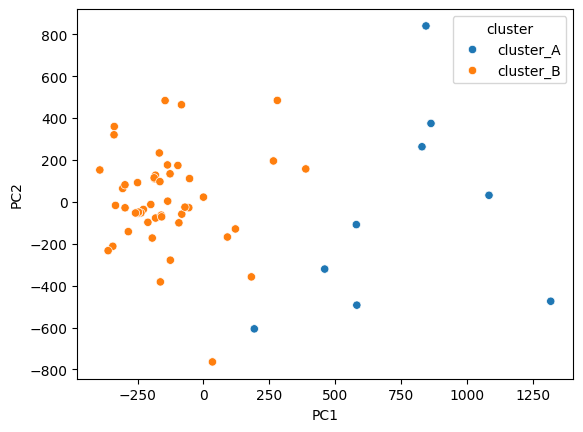

In [ ]:
sns.scatterplot(df_pca, x='PC1', y='PC2', hue='cluster') # Como esperado, os clusters estão bem separados

In [ ]:
components_df = pd.DataFrame(pca.components_, columns=X_converted.columns)

# Obter as probes mais influentes no componente 1
pc1_contributions = components_df.iloc[0].abs().sort_values(ascending=False)
print("Top probes contributing to PC1:")
print(pc1_contributions.head(10))

# Obter as probes mais influentes no componente 2
pc2_contributions = components_df.iloc[1].abs().sort_values(ascending=False)
print("Top probes contributing to PC2:")
print(pc2_contributions.head(10))  # Show the top 5 probes contributing to PC2


Top probes contributing to PC1:
cg05712793   0.01
cg08434803   0.01
cg09980384   0.01
cg02899685   0.01
cg12178904   0.01
cg02685896   0.01
cg02447542   0.01
cg22183077   0.01
cg05158362   0.01
cg24698401   0.01
Name: 0, dtype: float64
Top probes contributing to PC2:
cg04308040   0.01
cg12464529   0.01
cg25842470   0.01
cg25892001   0.01
cg05119076   0.01
cg14565474   0.01
cg10283975   0.01
cg07736602   0.01
cg26862981   0.01
cg08563201   0.01
Name: 1, dtype: float64


### É possível reproduzir o agrupamento utilizando um número menor de probes? Os dados originais foram agrupados com base em 750k colunas

#### Várias quantidades foram testadas (5, 10, 50, 500, 5000) e 50 probes de cada componente principal obtiveram uma acurácia de 90% em relação às 750k originais com bem menos esforço computacional

In [ ]:
# Agregar em uma lista as 50 probes mais influentes de cada componente

top_probes = list(pc1_contributions.head(50).index)
print(top_probes)

top_probes.append(list(pc2_contributions.head(50).index))

print(top_probes)

['cg05712793', 'cg08434803', 'cg09980384', 'cg02899685', 'cg12178904', 'cg02685896', 'cg02447542', 'cg22183077', 'cg05158362', 'cg24698401', 'cg20964082', 'cg01971227', 'cg22263612', 'cg01343041', 'cg20408276', 'cg07199894', 'cg26091981', 'cg17653203', 'cg16889489', 'cg15022400', 'cg18560328', 'cg23239891', 'cg01738406', 'cg17285448', 'cg26292232', 'cg27384682', 'cg04510282', 'cg09876615', 'cg16444001', 'cg14429393', 'cg18403478', 'cg18096398', 'cg18094203', 'cg00660655', 'cg23303685', 'cg17136630', 'cg25262361', 'cg08678508', 'cg00249997', 'cg13208954', 'cg05775862', 'cg00124711', 'cg12119381', 'cg19628771', 'cg04598121', 'cg11940368', 'cg00346244', 'cg14461913', 'cg01255747', 'cg13262008']
['cg05712793', 'cg08434803', 'cg09980384', 'cg02899685', 'cg12178904', 'cg02685896', 'cg02447542', 'cg22183077', 'cg05158362', 'cg24698401', 'cg20964082', 'cg01971227', 'cg22263612', 'cg01343041', 'cg20408276', 'cg07199894', 'cg26091981', 'cg17653203', 'cg16889489', 'cg15022400', 'cg18560328', 'cg2

In [ ]:
groups = ['id', 'clinical_presentation', 'disease_stage', 'outcome', 'clusters'] # Selecionar os principais grupos que serão testados nas etapas a seguir
subset = df[groups].copy() # Iniciar um dataframe que será utilizado para as análises utilizando apenas 100 probes, no lugar das 750k originais
subset.head()

,id,clinical_presentation,disease_stage,outcome,clusters
0,pACT001,C,III,Deceased,cluster_A
1,pACT003,A,IV,Alive and disease-free,cluster_B
2,pACT006,V,II,Alive and disease-free,cluster_B
3,pACT009,V,II,Alive and disease-free,cluster_B
4,pACT010,V,I,Alive and disease-free,cluster_B


In [ ]:
for probe in top_probes: # Incluir as 100 probes ao dataframe "subset"
    subset[probe] = df[probe]

/var/folders/2j/1g4njyd9743cj8gq894v8vxh0000gn/T/ipykernel_96954/3053307652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  subset[probe] = df[probe]


In [287]:
subset.head()

,id,clinical_presentation,disease_stage,outcome,clusters,cg05712793,cg08434803,cg09980384,cg02899685,cg12178904,cg02685896,cg02447542,cg22183077,cg05158362,cg24698401,cg20964082,cg01971227,cg22263612,cg01343041,cg20408276,cg07199894,cg26091981,cg17653203,cg16889489,cg15022400,cg18560328,cg23239891,cg01738406,cg17285448,cg26292232,cg27384682,cg04510282,cg09876615,cg16444001,cg14429393,cg18403478,cg18096398,cg18094203,cg00660655,cg23303685,cg17136630,cg25262361,cg08678508,cg00249997,cg13208954,cg05775862,cg00124711,cg12119381,cg19628771,cg04598121,...,cg04308040,cg12464529,cg25842470,cg25892001,cg05119076,cg14565474,cg10283975,cg07736602,cg26862981,cg08563201,cg14726637,cg18591945,cg18056212,cg01589960,cg04009537,cg05381312,cg23680049,cg18313762,cg05767392,cg03156008,cg07608867,cg19208051,cg03327962,cg19473428,cg00693776,cg15742729,cg25283565,cg06477797,cg19019371,cg14519997,cg02265690,cg00039044,cg06398769,cg01911708,cg11643473,cg00245050,cg14728380,cg07730071,cg10988673,cg16433788,cg00175844,cg25872281,cg16048006,cg04454664,cg16454940,cg08896512,cg17921439,cg15641011,cg21535022,cg20779181
0,pACT001,C,III,Deceased,cluster_A,3.31,3.70,3.14,-3.79,4.25,4.45,-4.88,3.21,4.33,2.84,-4.68,2.28,4.31,4.56,3.64,-3.46,3.12,3.80,-3.19,3.97,4.50,-4.52,2.99,4.28,2.41,3.50,4.47,3.73,4.05,3.92,4.99,3.83,3.52,4.31,4.16,-5.36,0.47,3.65,2.65,-4.07,4.12,3.55,4.57,3.65,2.92,...,5.29,-4.01,-4.30,-5.27,-5.27,-4.69,-4.30,-4.52,-2.41,-5.30,4.60,-5.85,-5.34,-5.74,-3.95,-6.14,-4.34,-3.43,-5.46,-4.86,-3.82,-5.02,0.43,4.84,0.52,-1.89,4.90,-4.54,-4.77,-6.43,-5.87,-4.26,-4.83,3.50,-0.57,-4.83,-1.09,-0.08,2.99,2.32,-4.59,-3.48,-3.95,2.04,-3.45,3.44,3.93,-4.97,-5.46,-2.11
1,pACT003,A,IV,Alive and disease-free,cluster_B,-6.66,-6.15,-5.79,4.37,-3.34,-4.66,3.97,-5.85,-5.15,-2.65,5.35,-4.71,-3.25,-4.77,-4.83,5.14,-5.55,-5.00,4.28,-4.84,-4.81,5.01,-3.92,-6.23,-4.75,-5.47,-1.47,-5.46,-4.48,-4.52,-3.60,-6.16,-2.92,-1.86,-1.91,4.22,-6.35,-1.08,-6.06,3.90,-5.17,-3.20,-4.55,-4.99,-4.15,...,-0.52,0.29,0.12,-0.20,-0.48,-3.02,1.39,-2.29,-1.32,1.10,1.04,-0.55,-1.11,-1.79,0.08,-0.68,-2.44,0.44,-2.62,0.37,-2.40,0.19,-2.16,-3.89,-0.53,0.56,1.16,1.48,-2.12,-5.45,-0.82,-0.05,-1.45,-3.89,-2.44,1.21,-2.99,-6.39,-0.15,0.66,-1.07,0.26,1.61,0.09,-0.66,-1.11,2.04,0.20,-0.63,-4.69
2,pACT006,V,II,Alive and disease-free,cluster_B,-6.89,-6.36,-6.43,4.39,-5.49,-5.91,3.09,-6.71,-4.86,-2.87,4.48,-5.75,-4.56,-4.60,-6.24,3.59,-6.23,-4.47,-1.70,-5.29,-5.21,2.82,-6.83,-6.33,-6.70,-5.67,0.08,-5.86,-5.10,-5.64,-5.10,-2.57,-5.56,-5.60,-6.53,3.71,-6.54,-5.73,-6.44,1.46,-5.18,-4.77,-5.21,-5.33,-5.62,...,-5.35,-4.22,-1.97,-5.73,-5.28,-4.19,-2.50,-4.78,-5.23,-3.27,-0.04,-4.70,0.11,-5.11,-4.75,-6.06,-4.17,-1.55,-5.39,-4.26,-3.88,-1.87,-1.25,-3.73,-4.90,-3.99,-4.14,-3.28,-3.81,-6.04,-5.81,-2.25,-4.37,-4.62,-4.82,-2.22,-4.57,-6.43,-1.57,-1.74,-3.71,-3.41,-2.42,1.02,-5.69,-4.91,-2.97,-2.74,-4.99,-5.53
3,pACT009,V,II,Alive and disease-free,cluster_B,-6.41,-6.35,-6.16,3.98,-1.36,-5.68,2.72,-6.09,-5.09,-6.44,4.58,-5.39,-5.67,-4.73,-5.78,4.01,-6.08,-5.18,-2.16,-5.21,-5.49,4.87,-5.99,-5.94,-6.35,-5.62,-5.61,-5.87,-5.36,-1.99,0.92,-6.01,-5.71,-5.34,-6.12,4.15,-6.12,-5.62,-6.25,-0.39,-5.01,-0.97,-4.46,-4.47,-5.06,...,1.91,-5.20,-1.22,-5.79,-5.22,-2.23,0.74,-5.57,-5.36,-0.66,-2.50,-5.14,2.16,-4.61,-4.52,-6.27,-0.05,2.78,-1.05,-2.85,-3.50,-3.73,-2.48,-2.75,0.16,-3.55,-4.61,-2.58,-0.07,-1.06,-4.78,-5.23,-2.06,-5.04,-4.98,-0.20,-5.25,-3.77,-3.64,-3.11,2.77,-6.11,-0.59,-0.36,-5.59,-1.50,0.72,-4.32,-5.54,-5.59
4,pACT010,V,I,Alive and disease-free,cluster_B,-6.65,-5.77,-5.83,2.67,-2.48,-5.37,4.03,-1.95,-5.31,-4.27,4.68,-5.55,-2.25,-3.27,-5.43,1.52,-5.92,-5.46,-0.43,-3.56,-5.36,5.09,-6.30,-5.48,-4.84,-2.75,-0.74,-5.07,-2.92,-5.24,-4.10,-5.53,-5.59,-5.38,0.36,3.89,-6.50,-2.07,-6.17,-0.17,-5.14,-3.54,-4.43,-0.27,-2.30,...,-3.86,-2.87,-1.97,-4.91,-0.22,-3.44,1.39,-3.99,-5.08,-3.31,-0.87,-5.24,-3.86,-3.84,-5.32,-5.92,-3.98,0.20,-4.10,-4.27,-2.19,-5.33,-4.89,-3.96,-4.36,-1.26,1.14,-2.53,-2.09,-6.23,-1.76,-4.78,-0.21,-4.09,-5.5

In [ ]:
subset_X = subset.drop(columns=groups) # Iniciar um novo 'X'

new_shc = shc.linkage(subset_X, method='ward', metric = 'euclidean') # Iniciar um novo modelo de agrupamento hierárquico

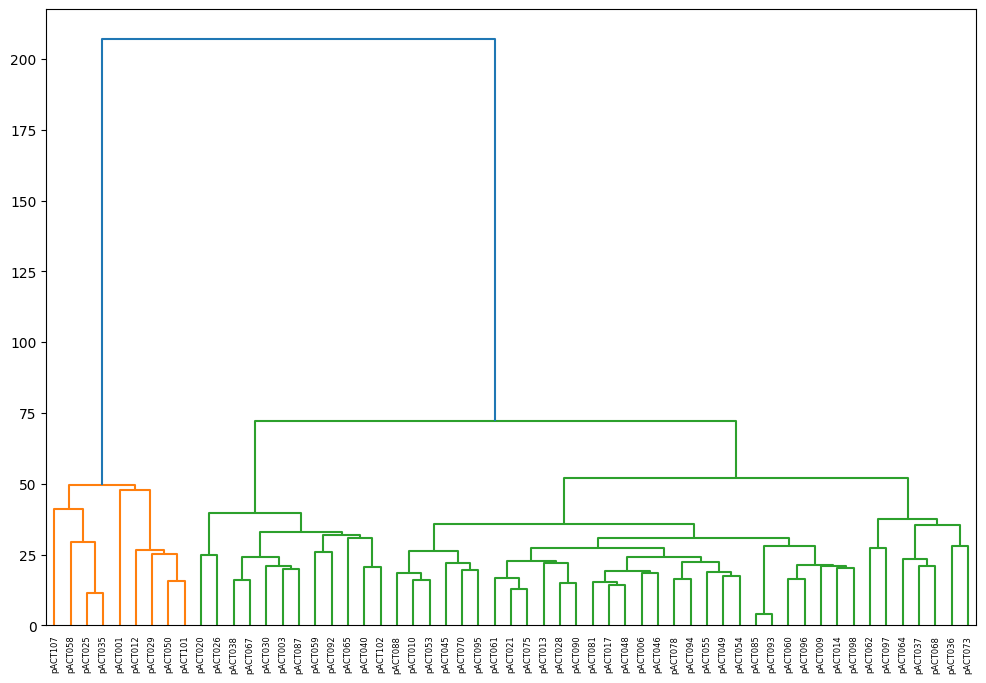

In [ ]:
plt.figure(figsize=(12,8))

new_dendro = shc.dendrogram(new_shc, labels = subset['id'].to_numpy()) # Realizar o agrupamento com as 100 probes selecionadas

In [290]:
subclusters = fcluster(new_shc, t=2, criterion='maxclust')
print(subclusters)

[1 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1]


In [ ]:
subset['subclusters'] = subclusters

# Reordenar as colunas para facilitar a visualização (clusters originais 750k e clusters com 100 probes)
cols = list(subset.columns)
cluster_index = cols.index('clusters')
cols.remove('subclusters')
cols.insert(cluster_index + 1, 'subclusters')
subset = subset[cols]

subset.head()

/var/folders/2j/1g4njyd9743cj8gq894v8vxh0000gn/T/ipykernel_96954/2586291455.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  subset['subclusters'] = subclusters


,id,clinical_presentation,disease_stage,outcome,clusters,subclusters,cg05712793,cg08434803,cg09980384,cg02899685,cg12178904,cg02685896,cg02447542,cg22183077,cg05158362,cg24698401,cg20964082,cg01971227,cg22263612,cg01343041,cg20408276,cg07199894,cg26091981,cg17653203,cg16889489,cg15022400,cg18560328,cg23239891,cg01738406,cg17285448,cg26292232,cg27384682,cg04510282,cg09876615,cg16444001,cg14429393,cg18403478,cg18096398,cg18094203,cg00660655,cg23303685,cg17136630,cg25262361,cg08678508,cg00249997,cg13208954,cg05775862,cg00124711,cg12119381,cg19628771,...,cg04308040,cg12464529,cg25842470,cg25892001,cg05119076,cg14565474,cg10283975,cg07736602,cg26862981,cg08563201,cg14726637,cg18591945,cg18056212,cg01589960,cg04009537,cg05381312,cg23680049,cg18313762,cg05767392,cg03156008,cg07608867,cg19208051,cg03327962,cg19473428,cg00693776,cg15742729,cg25283565,cg06477797,cg19019371,cg14519997,cg02265690,cg00039044,cg06398769,cg01911708,cg11643473,cg00245050,cg14728380,cg07730071,cg10988673,cg16433788,cg00175844,cg25872281,cg16048006,cg04454664,cg16454940,cg08896512,cg17921439,cg15641011,cg21535022,cg20779181
0,pACT001,C,III,Deceased,cluster_A,1,3.31,3.70,3.14,-3.79,4.25,4.45,-4.88,3.21,4.33,2.84,-4.68,2.28,4.31,4.56,3.64,-3.46,3.12,3.80,-3.19,3.97,4.50,-4.52,2.99,4.28,2.41,3.50,4.47,3.73,4.05,3.92,4.99,3.83,3.52,4.31,4.16,-5.36,0.47,3.65,2.65,-4.07,4.12,3.55,4.57,3.65,...,5.29,-4.01,-4.30,-5.27,-5.27,-4.69,-4.30,-4.52,-2.41,-5.30,4.60,-5.85,-5.34,-5.74,-3.95,-6.14,-4.34,-3.43,-5.46,-4.86,-3.82,-5.02,0.43,4.84,0.52,-1.89,4.90,-4.54,-4.77,-6.43,-5.87,-4.26,-4.83,3.50,-0.57,-4.83,-1.09,-0.08,2.99,2.32,-4.59,-3.48,-3.95,2.04,-3.45,3.44,3.93,-4.97,-5.46,-2.11
1,pACT003,A,IV,Alive and disease-free,cluster_B,2,-6.66,-6.15,-5.79,4.37,-3.34,-4.66,3.97,-5.85,-5.15,-2.65,5.35,-4.71,-3.25,-4.77,-4.83,5.14,-5.55,-5.00,4.28,-4.84,-4.81,5.01,-3.92,-6.23,-4.75,-5.47,-1.47,-5.46,-4.48,-4.52,-3.60,-6.16,-2.92,-1.86,-1.91,4.22,-6.35,-1.08,-6.06,3.90,-5.17,-3.20,-4.55,-4.99,...,-0.52,0.29,0.12,-0.20,-0.48,-3.02,1.39,-2.29,-1.32,1.10,1.04,-0.55,-1.11,-1.79,0.08,-0.68,-2.44,0.44,-2.62,0.37,-2.40,0.19,-2.16,-3.89,-0.53,0.56,1.16,1.48,-2.12,-5.45,-0.82,-0.05,-1.45,-3.89,-2.44,1.21,-2.99,-6.39,-0.15,0.66,-1.07,0.26,1.61,0.09,-0.66,-1.11,2.04,0.20,-0.63,-4.69
2,pACT006,V,II,Alive and disease-free,cluster_B,2,-6.89,-6.36,-6.43,4.39,-5.49,-5.91,3.09,-6.71,-4.86,-2.87,4.48,-5.75,-4.56,-4.60,-6.24,3.59,-6.23,-4.47,-1.70,-5.29,-5.21,2.82,-6.83,-6.33,-6.70,-5.67,0.08,-5.86,-5.10,-5.64,-5.10,-2.57,-5.56,-5.60,-6.53,3.71,-6.54,-5.73,-6.44,1.46,-5.18,-4.77,-5.21,-5.33,...,-5.35,-4.22,-1.97,-5.73,-5.28,-4.19,-2.50,-4.78,-5.23,-3.27,-0.04,-4.70,0.11,-5.11,-4.75,-6.06,-4.17,-1.55,-5.39,-4.26,-3.88,-1.87,-1.25,-3.73,-4.90,-3.99,-4.14,-3.28,-3.81,-6.04,-5.81,-2.25,-4.37,-4.62,-4.82,-2.22,-4.57,-6.43,-1.57,-1.74,-3.71,-3.41,-2.42,1.02,-5.69,-4.91,-2.97,-2.74,-4.99,-5.53
3,pACT009,V,II,Alive and disease-free,cluster_B,2,-6.41,-6.35,-6.16,3.98,-1.36,-5.68,2.72,-6.09,-5.09,-6.44,4.58,-5.39,-5.67,-4.73,-5.78,4.01,-6.08,-5.18,-2.16,-5.21,-5.49,4.87,-5.99,-5.94,-6.35,-5.62,-5.61,-5.87,-5.36,-1.99,0.92,-6.01,-5.71,-5.34,-6.12,4.15,-6.12,-5.62,-6.25,-0.39,-5.01,-0.97,-4.46,-4.47,...,1.91,-5.20,-1.22,-5.79,-5.22,-2.23,0.74,-5.57,-5.36,-0.66,-2.50,-5.14,2.16,-4.61,-4.52,-6.27,-0.05,2.78,-1.05,-2.85,-3.50,-3.73,-2.48,-2.75,0.16,-3.55,-4.61,-2.58,-0.07,-1.06,-4.78,-5.23,-2.06,-5.04,-4.98,-0.20,-5.25,-3.77,-3.64,-3.11,2.77,-6.11,-0.59,-0.36,-5.59,-1.50,0.72,-4.32,-5.54,-5.59
4,pACT010,V,I,Alive and disease-free,cluster_B,2,-6.65,-5.77,-5.83,2.67,-2.48,-5.37,4.03,-1.95,-5.31,-4.27,4.68,-5.55,-2.25,-3.27,-5.43,1.52,-5.92,-5.46,-0.43,-3.56,-5.36,5.09,-6.30,-5.48,-4.84,-2.75,-0.74,-5.07,-2.92,-5.24,-4.10,-5.53,-5.59,-5.38,0.36,3.89,-6.50,-2.07,-6.17,-0.17,-5.14,-3.54,-4.43,-0.27,...,-3.86,-2.87,-1.97,-4.91,-0.22,-3.44,1.39,-3.99,-5.08,-3.31,-0.87,-5.24,-3.86,-3.84,-5.32,-5.92,-3.98,0.20,-4.10,-4.27,-2.19,-5.33,-4.89,-3.96,-4.36,-1.26,1.14,-2.53,-2.09,-6.23,-1.76,-4.78,-0.21,-4.09,-5.55,-1.76,-4.70,-6.2

In [ ]:
subset['subclusters'] = subset['subclusters'].apply(lambda x: 'cluster_A' if x == 1 else 'cluster_B') # Renomear conforme o padrão anterior
subset.head()

,id,clinical_presentation,disease_stage,outcome,clusters,subclusters,cg05712793,cg08434803,cg09980384,cg02899685,cg12178904,cg02685896,cg02447542,cg22183077,cg05158362,cg24698401,cg20964082,cg01971227,cg22263612,cg01343041,cg20408276,cg07199894,cg26091981,cg17653203,cg16889489,cg15022400,cg18560328,cg23239891,cg01738406,cg17285448,cg26292232,cg27384682,cg04510282,cg09876615,cg16444001,cg14429393,cg18403478,cg18096398,cg18094203,cg00660655,cg23303685,cg17136630,cg25262361,cg08678508,cg00249997,cg13208954,cg05775862,cg00124711,cg12119381,cg19628771,...,cg04308040,cg12464529,cg25842470,cg25892001,cg05119076,cg14565474,cg10283975,cg07736602,cg26862981,cg08563201,cg14726637,cg18591945,cg18056212,cg01589960,cg04009537,cg05381312,cg23680049,cg18313762,cg05767392,cg03156008,cg07608867,cg19208051,cg03327962,cg19473428,cg00693776,cg15742729,cg25283565,cg06477797,cg19019371,cg14519997,cg02265690,cg00039044,cg06398769,cg01911708,cg11643473,cg00245050,cg14728380,cg07730071,cg10988673,cg16433788,cg00175844,cg25872281,cg16048006,cg04454664,cg16454940,cg08896512,cg17921439,cg15641011,cg21535022,cg20779181
0,pACT001,C,III,Deceased,cluster_A,cluster_A,3.31,3.70,3.14,-3.79,4.25,4.45,-4.88,3.21,4.33,2.84,-4.68,2.28,4.31,4.56,3.64,-3.46,3.12,3.80,-3.19,3.97,4.50,-4.52,2.99,4.28,2.41,3.50,4.47,3.73,4.05,3.92,4.99,3.83,3.52,4.31,4.16,-5.36,0.47,3.65,2.65,-4.07,4.12,3.55,4.57,3.65,...,5.29,-4.01,-4.30,-5.27,-5.27,-4.69,-4.30,-4.52,-2.41,-5.30,4.60,-5.85,-5.34,-5.74,-3.95,-6.14,-4.34,-3.43,-5.46,-4.86,-3.82,-5.02,0.43,4.84,0.52,-1.89,4.90,-4.54,-4.77,-6.43,-5.87,-4.26,-4.83,3.50,-0.57,-4.83,-1.09,-0.08,2.99,2.32,-4.59,-3.48,-3.95,2.04,-3.45,3.44,3.93,-4.97,-5.46,-2.11
1,pACT003,A,IV,Alive and disease-free,cluster_B,cluster_B,-6.66,-6.15,-5.79,4.37,-3.34,-4.66,3.97,-5.85,-5.15,-2.65,5.35,-4.71,-3.25,-4.77,-4.83,5.14,-5.55,-5.00,4.28,-4.84,-4.81,5.01,-3.92,-6.23,-4.75,-5.47,-1.47,-5.46,-4.48,-4.52,-3.60,-6.16,-2.92,-1.86,-1.91,4.22,-6.35,-1.08,-6.06,3.90,-5.17,-3.20,-4.55,-4.99,...,-0.52,0.29,0.12,-0.20,-0.48,-3.02,1.39,-2.29,-1.32,1.10,1.04,-0.55,-1.11,-1.79,0.08,-0.68,-2.44,0.44,-2.62,0.37,-2.40,0.19,-2.16,-3.89,-0.53,0.56,1.16,1.48,-2.12,-5.45,-0.82,-0.05,-1.45,-3.89,-2.44,1.21,-2.99,-6.39,-0.15,0.66,-1.07,0.26,1.61,0.09,-0.66,-1.11,2.04,0.20,-0.63,-4.69
2,pACT006,V,II,Alive and disease-free,cluster_B,cluster_B,-6.89,-6.36,-6.43,4.39,-5.49,-5.91,3.09,-6.71,-4.86,-2.87,4.48,-5.75,-4.56,-4.60,-6.24,3.59,-6.23,-4.47,-1.70,-5.29,-5.21,2.82,-6.83,-6.33,-6.70,-5.67,0.08,-5.86,-5.10,-5.64,-5.10,-2.57,-5.56,-5.60,-6.53,3.71,-6.54,-5.73,-6.44,1.46,-5.18,-4.77,-5.21,-5.33,...,-5.35,-4.22,-1.97,-5.73,-5.28,-4.19,-2.50,-4.78,-5.23,-3.27,-0.04,-4.70,0.11,-5.11,-4.75,-6.06,-4.17,-1.55,-5.39,-4.26,-3.88,-1.87,-1.25,-3.73,-4.90,-3.99,-4.14,-3.28,-3.81,-6.04,-5.81,-2.25,-4.37,-4.62,-4.82,-2.22,-4.57,-6.43,-1.57,-1.74,-3.71,-3.41,-2.42,1.02,-5.69,-4.91,-2.97,-2.74,-4.99,-5.53
3,pACT009,V,II,Alive and disease-free,cluster_B,cluster_B,-6.41,-6.35,-6.16,3.98,-1.36,-5.68,2.72,-6.09,-5.09,-6.44,4.58,-5.39,-5.67,-4.73,-5.78,4.01,-6.08,-5.18,-2.16,-5.21,-5.49,4.87,-5.99,-5.94,-6.35,-5.62,-5.61,-5.87,-5.36,-1.99,0.92,-6.01,-5.71,-5.34,-6.12,4.15,-6.12,-5.62,-6.25,-0.39,-5.01,-0.97,-4.46,-4.47,...,1.91,-5.20,-1.22,-5.79,-5.22,-2.23,0.74,-5.57,-5.36,-0.66,-2.50,-5.14,2.16,-4.61,-4.52,-6.27,-0.05,2.78,-1.05,-2.85,-3.50,-3.73,-2.48,-2.75,0.16,-3.55,-4.61,-2.58,-0.07,-1.06,-4.78,-5.23,-2.06,-5.04,-4.98,-0.20,-5.25,-3.77,-3.64,-3.11,2.77,-6.11,-0.59,-0.36,-5.59,-1.50,0.72,-4.32,-5.54,-5.59
4,pACT010,V,I,Alive and disease-free,cluster_B,cluster_B,-6.65,-5.77,-5.83,2.67,-2.48,-5.37,4.03,-1.95,-5.31,-4.27,4.68,-5.55,-2.25,-3.27,-5.43,1.52,-5.92,-5.46,-0.43,-3.56,-5.36,5.09,-6.30,-5.48,-4.84,-2.75,-0.74,-5.07,-2.92,-5.24,-4.10,-5.53,-5.59,-5.38,0.36,3.89,-6.50,-2.07,-6.17,-0.17,-5.14,-3.54,-4.43,-0.27,...,-3.86,-2.87,-1.97,-4.91,-0.22,-3.44,1.39,-3.99,-5.08,-3.31,-0.87,-5.24,-3.86,-3.84,-5.32,-5.92,-3.98,0.20,-4.10,-4.27,-2.19,-5.33,-4.89,-3.96,-4.36,-1.26,1.14,-2.53,-2.09,-6.23,-1.76,

In [ ]:
subset['prediction'] = subset.apply(lambda row: 'right' if row['clusters'] == row['subclusters'] else 'wrong', axis=1) # Definir uma coluna para verificar se a predição foi correta ou não
subset[['clusters', 'subclusters', 'prediction']]

/var/folders/2j/1g4njyd9743cj8gq894v8vxh0000gn/T/ipykernel_96954/2767921057.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  subset['prediction'] = subset.apply(lambda row: 'right' if row['clusters'] == row['subclusters'] else 'wrong', axis=1)


,clusters,subclusters,prediction
0,cluster_A,cluster_A,right
1,cluster_B,cluster_B,right
2,cluster_B,cluster_B,right
3,cluster_B,cluster_B,right
4,cluster_B,cluster_B,right
5,cluster_A,cluster_A,right
6,cluster_B,cluster_B,right
7,cluster_B,cluster_B,right
8,cluster_B,cluster_B,right
9,cluster_B,cluster_B,right


In [ ]:
accuracy = len(subset[subset['prediction'] == 'right']) / len(subset) # Quantas amostras foram agrupadas corretamente?
print(accuracy)

0.8947368421052632


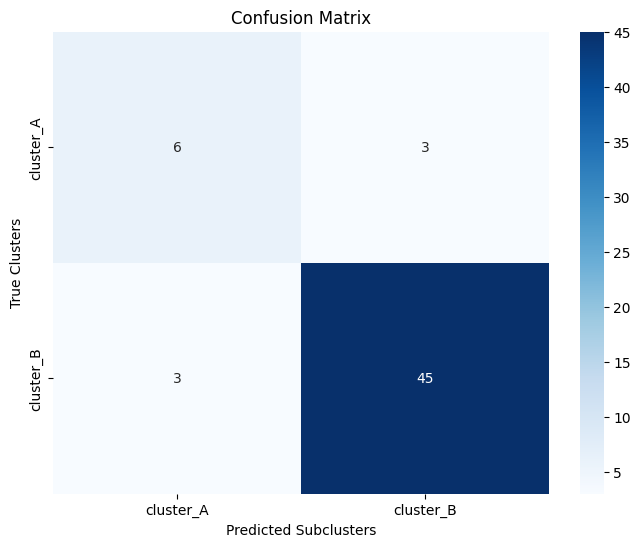

In [ ]:
# Visualizar a matriz de confusão
conf_matrix = confusion_matrix(subset['clusters'], subset['subclusters'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=subset['subclusters'].unique(),
            yticklabels=subset['clusters'].unique())
plt.xlabel("Predicted Subclusters")
plt.ylabel("True Clusters")
plt.title("Confusion Matrix")
plt.show()


### Me parece bastante razoável que 100 probes tenham 90% de acurácia de 750k probes
### Clinicamente isso não tem relevância, e temos os dados totais disponíveis, não há justificativa para tentar reduzir a amostra já que é viável realizar análises com o banco de dados original, mas para fins didáticos as próximas análises serão feitas com o "subset"

#### Temos algumas poucas informações clínicas das amostras. Os grupos visualizados se relacionam com alguma das informações?

In [302]:
# Principais desfechos relevantes
features = ['clinical_presentation', 'disease_stage', 'outcome']

# Loop para testar com chi2 a frequência de desfechos em cada cluster
for feature in features:
    contingency_table = pd.crosstab(subset['subclusters'], df[feature])
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Feature: {feature}")
    print(f"Chi-square Statistic: {chi2:.2f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:\n", expected)
    print("\n" + "-"*40 + "\n")


Feature: clinical_presentation
Chi-square Statistic: 6.04
p-value: 0.1096
Degrees of Freedom: 3
Expected Frequencies:
 [[ 1.10526316  0.94736842  6.78947368  0.15789474]
 [ 5.89473684  5.05263158 36.21052632  0.84210526]]

----------------------------------------

Feature: disease_stage
Chi-square Statistic: 27.41
p-value: 0.0000
Degrees of Freedom: 3
Expected Frequencies:
 [[ 4.89473684  2.36842105  0.78947368  0.94736842]
 [26.10526316 12.63157895  4.21052632  5.05263158]]

----------------------------------------

Feature: outcome
Chi-square Statistic: 30.99
p-value: 0.0000
Degrees of Freedom: 3
Expected Frequencies:
 [[ 6.47368421  0.47368421  1.42105263  0.63157895]
 [34.52631579  2.52631579  7.57894737  3.36842105]]

----------------------------------------



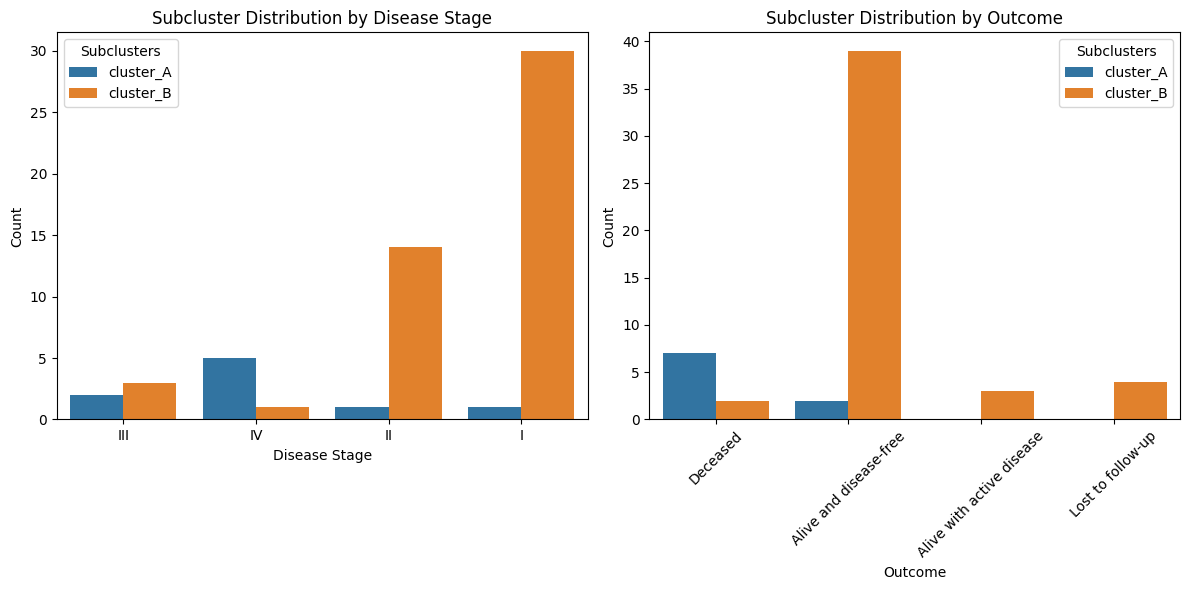

In [ ]:
# Agora de forma visual
plt.figure(figsize=(12, 6))

# Plot for disease_stage
plt.subplot(1, 2, 1)
sns.countplot(data=subset, x='disease_stage', hue='subclusters')
plt.title('Subcluster Distribution by Disease Stage')
plt.xlabel('Disease Stage')
plt.ylabel('Count')
plt.legend(title='Subclusters')

# Plot for outcome
plt.subplot(1, 2, 2)
sns.countplot(data=subset, x='outcome', hue='subclusters')
plt.title('Subcluster Distribution by Outcome')
plt.xlabel('Outcome')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Subclusters')

plt.tight_layout()
plt.show()


### Aparentemente os clusters se relacionam com o estadio tumoral e com o desfecho.
### Quais são as regiões do genoma correspondentes às probes selecionadas como "principais"?

In [ ]:
annotation = pd.read_csv('infinium-methylationepic-v-1-0-b5-manifest-file.csv', skiprows=7) # Dados de anotação obtidos de https://support.illumina.com/downloads/infinium-methylationepic-v1-0-product-files.html
annotation.head()

/var/folders/2j/1g4njyd9743cj8gq894v8vxh0000gn/T/ipykernel_96954/3170965143.py:1: DtypeWarning: Columns (2,4,42,47) have mixed types. Specify dtype option on import or set low_memory=False.
  annotation = pd.read_csv('infinium-methylationepic-v-1-0-b5-manifest-file.csv', skiprows=7)


,IlmnID,Name,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,Infinium_Design_Type,Next_Base,Color_Channel,Forward_Sequence,Genome_Build,CHR,MAPINFO,SourceSeq,Strand,UCSC_RefGene_Name,UCSC_RefGene_Accession,UCSC_RefGene_Group,UCSC_CpG_Islands_Name,Relation_to_UCSC_CpG_Island,Phantom4_Enhancers,Phantom5_Enhancers,DMR,450k_Enhancer,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,GencodeBasicV12_NAME,GencodeBasicV12_Accession,GencodeBasicV12_Group,GencodeCompV12_NAME,GencodeCompV12_Accession,GencodeCompV12_Group,DNase_Hypersensitivity_NAME,DNase_Hypersensitivity_Evidence_Count,OpenChromatin_NAME,OpenChromatin_Evidence_Count,TFBS_NAME,TFBS_Evidence_Count,Methyl27_Loci,Methyl450_Loci,Chromosome_36,Coordinate_36,SNP_ID,SNP_DISTANCE,SNP_MinorAlleleFrequency,Random_Loci,MFG_Change_Flagged,CHR_hg38,Start_hg38,End_hg38,Strand_hg38
0,cg07881041,cg07881041,85713262,CTACAAATACAACACCCTCAACCCATATTTCATATATTATCTCATT...,NaN,NaN,II,NaN,NaN,CTGCACGCCTACTGCAGGTGCAGCACCCTCAGCCCATGTTTCATGT...,37.00,19,"5,236,016.00",TGCAGGTGCAGCACCCTCAGCCCATGTTTCATGTATTATCTCATTT...,R,PTPRS;PTPRS;PTPRS;PTPRS,NM_130855;NM_002850;NM_130854;NM_130853,Body;Body;Body;Body,chr19:5237294-5237669,N_Shore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,19,5187016,rs187313142,18,0.000200,NaN,False,chr19,"5,236,004.00","5,236,006.00",+
1,cg18478105,cg18478105,46761277,AAATAAATTTCACTCTCAAATCCCAATCTCATACAACAAAACAAAA...,"86,644,198.00",AAATAAATTTCGCTCTCAAATCCCAATCTCGTACGACGAAACGAAA...,I,C,Grn,TCCCGTCTTACGGGATGGATTTCGCTCTCAGGTCCCAGTCTCGTGC...,37.00,20,"61,847,650.00",CGGTCCCCGCCCCGCCGCACGAGACTGGGACCTGAGAGCGAAATCC...,R,YTHDF1,NM_017798,TSS200,chr20:61846843-61848103,Island,NaN,NaN,NaN,NaN,20:61317142-61318498,20:61846284-61847956,Promoter_Associated,YTHDF1;YTHDF1,ENST00000370334.4;ENST00000370339.3,TSS200;TSS200,YTHDF1;YTHDF1,ENST00000370334.4;ENST00000370339.3,TSS200;TSS200,chr20:61847520-61847755,3.00,NaN,NaN,NaN,NaN,NaN,True,20,61318095,rs549944121,5,0.001797,NaN,False,chr20,"63,216,297.00","63,216,299.00",+
2,cg23229610,cg23229610,21717843,ATAAAATTCTTTCCTTAAAAAACATTAAAACCAAAATAAACAAAAA...,NaN,NaN,II,NaN,NaN,GTTTCTGGACAGTAAAATTCTTTCCTTGAAGGACATTAGGGCCAAA...,37.00,1,"6,841,125.00",CGGAATCCTTGCCCATTTTGGCCCTAATGTCCTTCAAGGAAAGAAT...,R,NaN,NaN,NaN,chr1:6844313-6846366,N_Shelf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1,6763712,rs545824288;rs527255711,40;12,0.000200;0.001198,NaN,False,chr1,"6,781,064.00","6,781,066.00",+
3,cg03513874,cg03513874,29622133,ACAATAAAATAATAAAATCCCATCACTACTTACCCTCCTTAAATAA...,NaN,NaN,II,NaN,NaN,ATTGTGCCCACCTTGCTGCTGACAGTTAAGCATCACTAAAGTAGGA...,37.00,2,"198,303,466.00",CAATGGGATGATGAGGTCCCATCACTACTTGCCCTCCTTAAGTAGT...,F,NaN,NaN,NaN,chr2:198299244-198299972,S_Shelf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2,198011711,NaN,NaN,NaN,NaN,False,chr2,"197,438,741.00","197,438,743.00",-
4,cg09835024,cg09835024,16745152,AATAAACACCAACCCCAAACCAATCTCACTTTATTAAATTACAAAA...,"81,631,976.00",AATAAACGCCGACCCCGAACCGATCTCGCTTTATTAAATTACAAAA...,I,A,Red,AGCCCCGTCATAGGTGGGCGCCGACCCCGAGCCGATCTCGCTTTAT...,37.00,X,"24,072,640.00",GGTGGGCGCCGACCCCGAGCCGATCTCGCTTTATTAAATTACAGAA...,R,EIF2S3,NM_001415,TSS1500,chrX:24072558-24073135,Island,NaN,NaN,NaN,NaN,NaN,X:24071907-24073667,Promoter_Associated,EIF2S3,ENST00000253039.4,TSS200,EIF2S3;EIF2S3;EIF2S3,ENST00000487075.1;ENST00000423068.1;ENST000002...,TSS1500;TSS1500;TSS200,chrX:24072600-24073395,3.00,NaN,NaN,NaN,NaN,NaN,True,X,23982561,NaN,NaN,NaN,NaN,False,chrX,"24,054,522.00","24,054,524.00",+


In [300]:
top_probes_annotations = annotation[annotation['IlmnID'].isin(top_probes)]

selected_columns = ['IlmnID', 'CHR', 'MAPINFO', 'Strand', 'UCSC_RefGene_Name', 'UCSC_RefGene_Accession', 'UCSC_CpG_Islands_Name']
top_probes_annotations = top_probes_annotations[selected_columns]

display(top_probes_annotations)


,IlmnID,CHR,MAPINFO,Strand,UCSC_RefGene_Name,UCSC_RefGene_Accession,UCSC_CpG_Islands_Name
12327,cg18560328,11,"7,273,148.00",R,SYT9,NM_175733,chr11:7272757-7274235
29688,cg00346244,16,"87,468,226.00",F,ZCCHC14,NM_015144,NaN
62036,cg23239891,19,"8,808,017.00",F,ACTL9,NM_178525,chr19:8807813-8808794
62728,cg19628771,3,"9,027,576.00",F,SRGAP3;SRGAP3,NM_001033117;NM_014850,chr3:9027156-9027611
67523,cg01255747,13,"108,870,449.00",F,ABHD13;LIG4,NM_032859;NM_001098268,chr13:108870502-108871328
81262,cg18403478,17,"1,683,424.00",R,SMYD4,NM_052928,NaN
99282,cg14429393,12,"11,802,968.00",R,ETV6;ETV6,NM_001987;NM_001987,chr12:11802752-11802983
103832,cg14461913,9,"138,799,741.00",R,CAMSAP1,NM_015447,chr9:138798462-138800325
114048,cg22183077,18,"21,165,427.00",F,NPC1,NM_000271,chr18:21166158-21167066
122612,cg07199894,12,"132,379,104.00",F,ULK1,NM_003565,chr12:132379542-132380052
